# Pressure Jump at Initial Direct Liquid Water-Magma Contact

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
import seaborn as sbn
from scipy.optimize import curve_fit

In [2]:
pltt = sbn.color_palette([c['color'] for c in plt.rcParams['axes.prop_cycle']])
pltt

[(0.0, 0.18823529411764706, 0.43529411764705883),
 (0.0, 0.6235294117647059, 0.5058823529411764),
 (0.6431372549019608, 0.00392156862745098, 0.13333333333333333),
 (1.0, 0.43137254901960786, 0.22745098039215686),
 (0.5176470588235295, 0.0, 0.803921568627451),
 (0.0, 0.5529411764705883, 0.9764705882352941),
 (0.0, 0.5843137254901961, 0.011764705882352941),
 (0.0, 0.7607843137254902, 0.9764705882352941),
 (0.8862745098039215, 0.00392156862745098, 0.20392156862745098),
 (1.0, 0.7647058823529411, 0.23137254901960785)]

## Material Properties

- $\alpha_\text{p}$:
  Volumetric thermal expansion coefficient (at const. pressure)  
  $\alpha_\text{p} = \dfrac{1}{V}\Bigl(\dfrac{\partial V}{\partial T}\Bigr)_p$
- $c_p$: specific heat capacity (at const. pressure)
- $k$: thermal conductivity
- $a$: thermal diffusivity

### Water

Water properties from the revised IAPWS 97 formulation

Cooper, J. R., & Dooley, R. B. (2007). Revised release on the IAPWS industrial formulation 1997 for the thermodynamic properties of water and steam (techreport). IAPWS. Retrieved from http://www.iapws.org/relguide/IF97-Rev.html

Pátek, J., Hrubý, J., Klomfar, J., Soucková, M., & Harvey, A. H. (2009). Reference correlations for thermophysical properties of liquid water at 0.1 MPa. Journal of Physical and Chemical Reference Data, 38(1), 21–29. [doi: 10.1063/1.3043575](https://doi.org/10.1063/1.3043575)

In [3]:
α_w = 7e-4
β_w = 4.5e-10
cp_w = 4.2e3

In [4]:
ρ_w = 1 / 1.02e-3
k_w = 0.675
a_w = k_w / (ρ_w * cp_w)
arg_w = k_w / np.sqrt(a_w)
arg_w

1667.156790678634

### Melt

Melt properties from

Moitra, P., Sonder, I., & Valentine, G. A. (2018). Effects of size and temperature-dependent thermal conductivity on the cooling of pyroclasts in air. Geochemistry, Geophysics, Geosystems, 19(10), 3623–3636. [doi: 10.1029/2018GC007510](https://doi.org/10.1029/2018GC007510)

Compresibility is from:

Kuryaeva, R. G., & Kirkinskii, V. A. (1997). Influence of high pressure on the refractive index and density of tholeiite basalt glass. Physics and Chemistry of Minerals, 25(1), 48–54. [doi: 10.1007/s002690050085](https://doi.org/10.1007/s002690050085)


In [5]:
ρ_m = 2950
cp_m = 1.2e3
β_m = 2.5e-11
a_m = 5e-7  
k_m = 2.0
arg_m = k_m / np.sqrt(a_m)
arg_m

2828.42712474619

**Volumetric thermal expantion coefficient from data of**

Büttner, R., Zimanowski, B., Blumm, J., & Hagemann, L. (1998). Thermal conductivity of a volcanic rock material (olivine-Melilitite) in the temperature range between 288 and 1470 k. Journal of Volcanology and Geothermal Research, 80, 293–302, [doi: 10.1016/S0377-0273(97)00050-4](https://doi.org/10.1016/S0377-0273(97)00050-4).

$$
\alpha_p = \frac{1}{V}\Bigl(\frac{\partial V}{\partial T}\Bigr)_p
= -\frac{1}{\rho}\Bigl(\frac{\partial \rho}{\partial T}\Bigr)_p
$$

|T         | rho        | Cp            | a             | k             |
|----------|------------|---------------|---------------|---------------|
| (K)      | (kg/m3)    | (J/g/K)       | (cm2/s)       | (W/m/K)       |
| 288 ± 1  | 3091 ± 9   | 0.758 ± 0.023 | 0.869 ± 0.026 | 2.036 ± 0.087 |
| 466 ± 1  | 3077 ± 15  | 0.921 ± 0.027 | 0.723 ± 0.022 | 2.049 ± 0.087 |
| 676 ± 1  | 3055 ± 15  | 0.980 ± 0.029 | 0.642 ± 0.019 | 1.922 ± 0.082 |
| 871 ± 1  | 3034 ± 15  | 1.075 ± 0.032 | 0.542 ± 0.016 | 1.768 ± 0.075 |
| 965 ± 1  | 3022 ± 15  | 1.147 ± 0.034 | 0.505 ± 0.015 | 1.750 ± 0.075 |
| 1067 ± 1 | 3012 ± 15  | 1.244 ± 0.037 | 0.528 ± 0.016 | 1.978 ± 0.084 |
| 1117 ± 1 | 3009 ± 15  | 1.299 ± 0.039 | 0.544 ± 0.016 | 2.126 ± 0.091 |
| 1167 ± 1 | 3002 ± 15  | 1.357 ± 0.041 | 0.573 ± 0.017 | 2.334 ± 0.100 |
| 1215 ± 1 | 2993 ± 21  | 1.413 ± 0.042 | 0.601 ± 0.018 | 2.542 ± 0.109 |
| 1271 ± 1 | 2974 ± 148 | 1.478 ± 0.074 | 0.582 ± 0.029 | 2.558 ± 0.222 |
| 1320 ± 1 | 2959 ± 147 | 1.535 ± 0.076 | 0.521 ± 0.026 | 2.366 ± 0.205 |
| 1345 ± 1 | 2953 ± 147 | 1.564 ± 0.078 | 0.246 ± 0.012 | 1.136 ± 0.098 |
| 1370 ± 1 | 2947 ± 147 | 1.593 ± 0.079 | 0.248 ± 0.012 | 1.164 ± 0.101 |
| 1418 ± 1 | 2936 ± 147 | 1.694 ± 0.084 | 0.230 ± 0.012 | 1.144 ± 0.099 |
| 1467 ± 1 | 2925 ± 146 | 1.696 ± 0.085 | 0.219 ± 0.011 | 1.086 ± 0.094 |

In [6]:
tempf = np.array([1271, 1320, 1345, 1370, 1418, 1467])
rho = np.array([2974, 2959, 2953, 2947, 2936, 2925])

In [7]:
def linear(x, a, b):
    return a * x + b

In [8]:
res = curve_fit(linear, tempf, rho)
res

(array([-2.46011715e-01,  3.28484699e+03]),
 array([[ 7.43647127e-05, -1.01520228e-01],
        [-1.01520228e-01,  1.38895674e+02]]))

In [9]:
α_m = -res[0][0] / 2950.
α_m

8.339380164280954e-05

## Contact temperature:

$$
j_\text{m} = \frac{k_\text{m}}{\sqrt{a_\text{m}}}
\quad,\quad
j_\text{w} = \frac{k_\text{w}}{\sqrt{a_\text{w}}}
$$

$$
T_\text{c} = \frac{T_\text{m}j_\text{m} + T_\text{w}j_\text{w}}{j_\text{m} + j_\text{w}}
$$

'Effective' homogeneous nucleation temperature after Cronenberg (1980):

$$
T_\text{N} = 0.9\,T_\text{N,max} = 0.9\times 647\,\mathrm{K} \simeq 583\,\mathrm{K}
$$

Cronenberg, A. W. (1980). Recent developments in the understanding of energetic molten fuel-coolant interactions. Nuclear Safety, 3, 319–337.

In [10]:
T0 = 273.15
THN = 647 * 0.9
THN - T0

309.1500000000001

In [11]:
def temp_c(Tmelt, Tw):
    return (Tmelt * arg_m + Tw * arg_w) / (arg_m + arg_w)

In [12]:
Tc = temp_c(1200 + T0, 90 + T0)
Tc

1061.514031799324

In [13]:
ρ_w * cp_w / α_w / 1e9

5.882352941176471

In [14]:
Tpool = 90 + T0
Tmax = Tc

T = np.linspace(Tpool, Tmax, 300)

All realistic contact temperatures are above $T_\text{HN}$ (585 K).

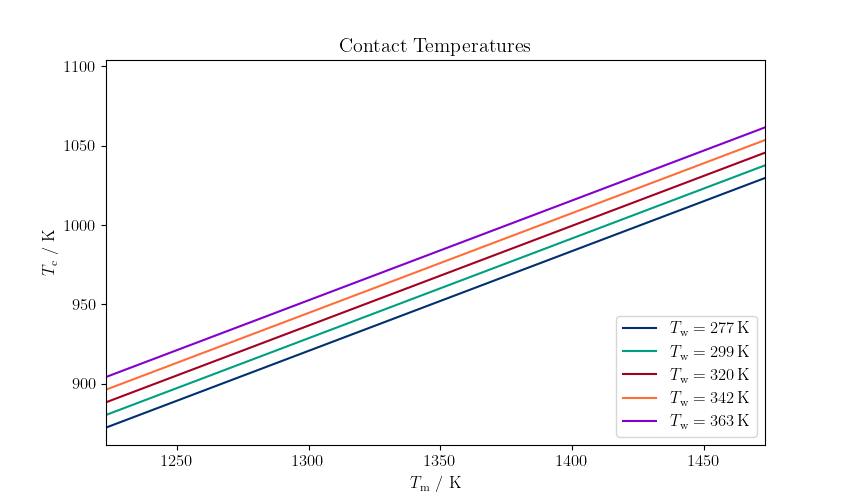

In [15]:
fig, ax = plt.subplots()

Tm = np.linspace(950, 1250, 100, True) + T0
for i in range(5):
    Tp = 4 + (90 - 4) * i / 4 + T0
    ax.plot(Tm, temp_c(Tm, Tp), label=r'$T_\text{w}=%.0f\,\mathrm{K}$' % Tp)
ax.legend(loc='lower right')
ax.set(
    xlabel=r'$T_\text{m}\ /\ \mathrm{K}$',
    ylabel=r'$T_\text{c}\ /\ \mathrm{K}$',
    xlim=(1223.15, 1473.15),
    title=r'Contact Temperatures'
);

## Pressure Jump

- Temperature of water away from the interface: $T_\text{w}$
- Temperature at the interface: $T_\text{c}$ (contact temperature)
- Temperature of melt away from the interface: $T_\text{m}$

$$
T_\text{W} < T_\text{c} < T_\text{m}
$$


### The Adiabatic Case

$$
\Bigl(\frac{\partial p}{\partial T}\Bigr)_S
= \frac{\rho c_p}{\alpha_p T}
$$

$$
\begin{align}
\Delta p &= \Delta p_\text{w} + \Delta p_\text{m} \\
 &= \int_{T_\text{w}}^{T_\text{N}} \Bigl(\frac{\partial p}{\partial T}\Bigr)_S dT
 + \int_{T_\text{c}}^{T_\text{m}} \Bigl(\frac{\partial p}{\partial T}\Bigr)_S dT \\
 &= \frac{\rho_{p,\text{w}}c_{p,\text{w}}}{\alpha_{p,\text{w}}}
 \int_{T_\text{w}}^{T_\text{N}} \frac{dT}{T}
 + \frac{\rho_{p,\text{m}}c_{p,\text{m}}}{\alpha_{p,\text{m}}}
 \int_{T_\text{c}}^{T_\text{m}} \frac{dT}{T} \\
 &= \frac{\rho_{p,\text{w}}c_{p,\text{w}}}{\alpha_{p,\text{w}}}\, \ln \frac{T_\text{N}}{T_\text{w}}
 + \frac{\rho_{p,\text{m}}c_{p,\text{m}}}{\alpha_{p,\text{m}}}\, \ln \frac{T_\text{m}}{T_\text{c}}
\end{align}
$$

#### dp/dT

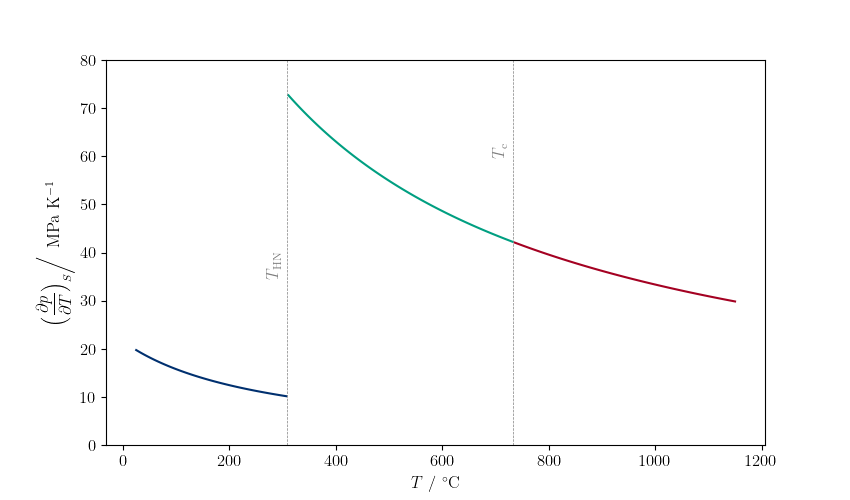

In [16]:
fig, ax = plt.subplots()

T = np.linspace(25, 1150, 300) + T0
idx = T <= THN
ax.plot(T[idx] - T0, 1e-6 * ρ_w * cp_w / (α_w * T[idx]))
Tc = temp_c(T[-1], T[0])
idx = np.logical_and(T > THN, T <= Tc)
ax.plot(T[idx] - T0, 1e-6 * ρ_m * cp_m / (α_m * T[idx]))
idx = T >= Tc
ax.plot(T[idx] - T0, 1e-6 * ρ_m * cp_m / (α_m * T[idx]))
ax.axvline(THN - T0, color='gray', ls='dashed', lw=.5)
ax.axvline(Tc - T0, color='gray', ls='dashed', lw=.5)
ax.text(THN - T0 - 10, 35, r'$T_\text{HN}$', ha='right', rotation=90, color='gray')
ax.text(Tc - T0 - 10, 60, r'$T_\text{c}$', ha='right', rotation=90, color='gray')
ax.set(
    xscale='linear', yscale='linear',
    xlabel=r'$T\ /\ \mathrm{^\circ C}$',
    ylabel=r'$\left.\Bigl(\dfrac{\partial p}{\partial T}\Bigr)_S'
           r'\right/\ \mathrm{MPa\,\,K^{-1}}$',
    ylim=(0, 80)
);

#### Δp

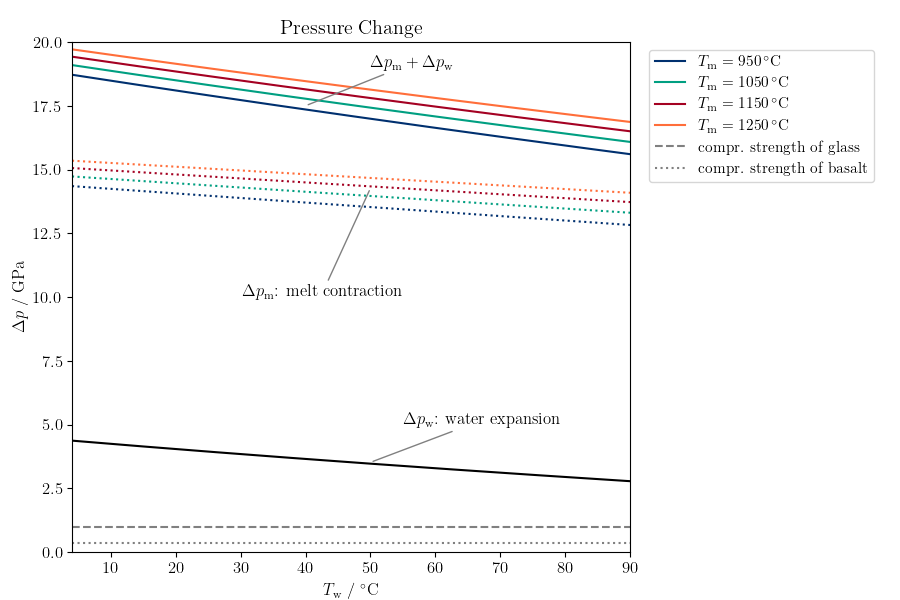

In [17]:
fig, ax = plt.subplots()

Tp = np.linspace(4., 90., 300, True) + T0
dpw = (ρ_w * cp_w / α_w) * np.log(THN / Tp)
ax.plot(Tp - T0, dpw / 1e9, color='k', ls='solid')
for i in range(4):
    Tm = 950. + 100 * i + T0
    Tc = temp_c(Tm, Tp)
    dpm = (ρ_m * cp_m / α_m) * np.log(Tm / Tc)
    l, = ax.plot(Tp - T0, dpm / 1e9, ls='dotted')
    clr = l.get_color()
    ax.plot(
        Tp - T0, (dpw + dpm) / 1e9, color=clr, ls='solid',
        label=r'$T_\text{m}=%.0f\,\mathrm{^\circ C}$' % (Tm - T0)
    )
ax.axhline(y=1., ls='dashed', color='gray', label=r'compr. strength of glass')
ax.axhline(y=3.5e-1, ls='dotted', color='gray', label=r'compr. strength of basalt')
ax.annotate(
    r'$\Delta p_\text{w}$: water expansion',
    xy=(50, dpw[len(dpw) // 2] / 1e9), xytext=(55, 5),
    arrowprops=dict(arrowstyle='-', color='gray')
)
ax.annotate(
    r'$\Delta p_\text{m}$: melt contraction',
    xy=(50, .97 * dpm[len(dpm) // 2] / 1e9), xytext=(55, 10), ha='right',
    arrowprops=dict(arrowstyle='-', color='gray')
)
ax.annotate(
    r'$\Delta p_\text{m} + \Delta p_\text{w}$',
    xy=(40, 17.5), xytext=(50, 19),
    arrowprops=dict(arrowstyle='-', color='gray')
)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.), fontsize=11)
ax.set(
    xlabel=r'$T_\text{w}\ /\ \mathrm{^\circ C}$',
    ylabel=r'$\Delta p\ /\ \mathrm{GPa}$',
    xlim=(4, 90), ylim=(0, 20),
    yscale='linear',
    title=r'Pressure Change'
);
fig.set_size_inches(9, 6)
fig.subplots_adjust(left=.08, right=.7, top=.93, bottom=.08)

### The Isochoric Case

$$
\Bigl(\frac{\partial p}{\partial T}\Bigr)_V = \frac{\alpha_p}{\beta_T}
$$

$$
\Delta p_\text{w} = \frac{\alpha_{p,\text{w}}}{\beta_{T,\text{w}}}(T_\text{N} - T_\text{w})
$$

$$
\Delta p_\text{m} = \frac{\alpha_{p,\text{m}}}{\beta_{T,\text{m}}}(T_\text{m} - T_\text{c})
$$

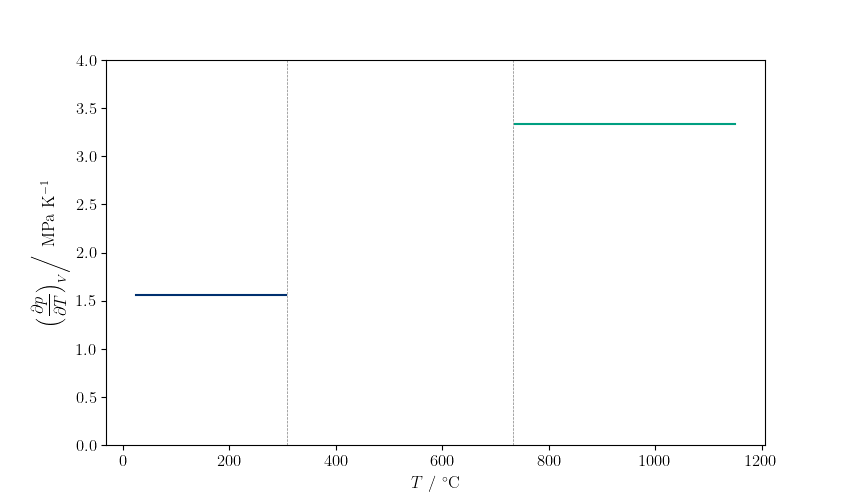

In [18]:
fig, ax = plt.subplots()

T = np.linspace(25, 1150, 300) + T0
idx = T <= THN
ax.plot(T[idx] - T0, 1e-6 * α_w / β_w * np.ones(np.count_nonzero(idx)))
Tc = temp_c(T[-1], T[0])
# idx = np.logical_and(T > THN, T <= Tc)
# ax.plot(T[idx] - T0, 1e-6 * (α_m / β_m) * (T[idx] - Tc))
idx = T >= Tc
ax.plot(T[idx] - T0, 1e-6 * α_m  / β_m * np.ones(np.count_nonzero(idx)))
ax.axvline(THN - T0, color='gray', ls='dashed', lw=.5)
ax.axvline(Tc - T0, color='gray', ls='dashed', lw=.5)
ax.text(THN - T0 - 10, 35, r'$T_\text{HN}$', ha='right', rotation=90, color='gray')
ax.text(Tc - T0 - 10, 60, r'$T_\text{c}$', ha='right', rotation=90, color='gray')
ax.set(
    xscale='linear', yscale='linear',
    xlabel=r'$T\ /\ \mathrm{^\circ C}$',
    ylabel=r'$\left.\Bigl(\dfrac{\partial p}{\partial T}\Bigr)_V'
           r'\right/\ \mathrm{MPa\,\,K^{-1}}$',
    ylim=(0, 4)
);

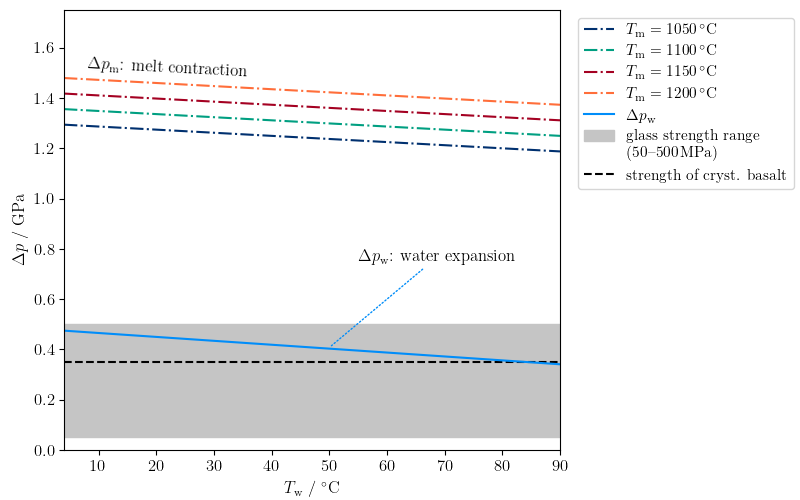

In [19]:
fig, ax = plt.subplots()

pl_b = ax.axhline(.35, ls='dashed', color='k', zorder=.5)
pl_s = ax.fill_between([4, 90], .5, .05, color='#c5c5c5', zorder=0)
Tp = np.linspace(4., 90., 300, True) + T0
dpw = (α_w / β_w) * (THN - Tp)
pl_w, = ax.plot(Tp - T0, dpw / 1e9, color=pltt[5], ls='solid', zorder=1)
pl_m, lbls = [], []
for i in range(4):
    Tm = 1050. + 50 * i + T0
    Tc = temp_c(Tm, Tp)
    dpm = (α_m / β_m) * (Tm - Tc)
    l, = ax.plot(Tp - T0, dpm / 1e9, ls='-.')
    pl_m.append(l)
    lbls.append(r'$T_\text{m}=%.0f\,\mathrm{^\circ C}$' % (Tm - T0))
ax.annotate(
    r'$\Delta p_\text{w}$: water expansion',
    xy=(50, dpw[len(dpw) // 2] / 1e9), xytext=(55, .75),
    arrowprops=dict(arrowstyle='-', ls='dotted', color=pltt[5])
)
ax.text(
    8, 1.47, r'$\Delta p_\text{m}$: melt contraction',
    ha='left', va='bottom', rotation=-3
)
ax.legend(
    pl_m + [pl_w, pl_s, pl_b],
    lbls + [r'$\Delta p_\text{w}$',
            r'\noindent glass strength range\\(50--500\,MPa)',
            'strength of cryst. basalt'],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    loc='upper left', bbox_to_anchor=(1.02, 1.), fontsize=11
)
ax.set_yticks([0, .5, 1, 1.5, 2])
ax.set(
    xlabel=r'$T_\text{w}\ /\ \mathrm{^\circ C}$',
    ylabel=r'$\Delta p\ /\ \mathrm{GPa}$',
    xlim=(4, 90), ylim=(0, 1.75),
    yscale='linear',
    # title=r'Pressure Change at Initial Magma-Liquid Water Contact'
)
fig.set_size_inches(8, 5)
fig.subplots_adjust(left=.08, right=.7, top=.98, bottom=.1)

## Compare Icochoric and Isentropic Pressure Derivatives

In [20]:
pltt

[(0.0, 0.18823529411764706, 0.43529411764705883),
 (0.0, 0.6235294117647059, 0.5058823529411764),
 (0.6431372549019608, 0.00392156862745098, 0.13333333333333333),
 (1.0, 0.43137254901960786, 0.22745098039215686),
 (0.5176470588235295, 0.0, 0.803921568627451),
 (0.0, 0.5529411764705883, 0.9764705882352941),
 (0.0, 0.5843137254901961, 0.011764705882352941),
 (0.0, 0.7607843137254902, 0.9764705882352941),
 (0.8862745098039215, 0.00392156862745098, 0.20392156862745098),
 (1.0, 0.7647058823529411, 0.23137254901960785)]

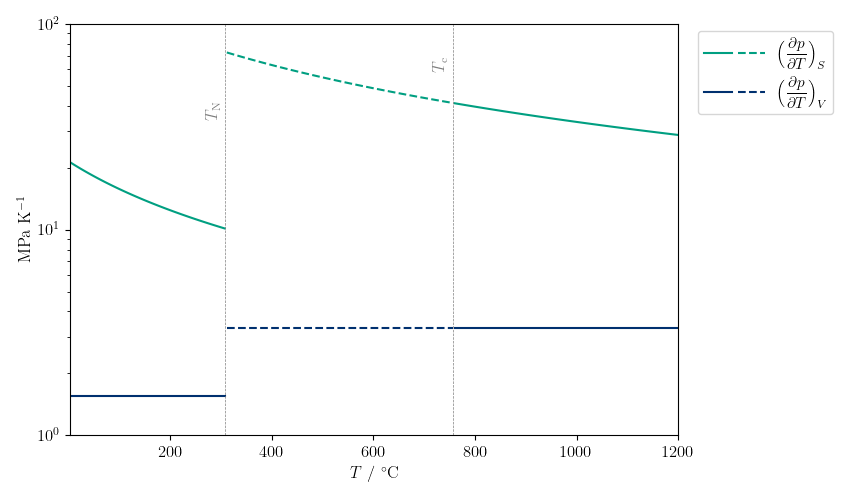

In [21]:
fig, ax = plt.subplots()

T = np.linspace(4, 1200, 300) + T0
idx = T <= THN
ls_s, = ax.plot(T[idx] - T0, 1e-6 * ρ_w * cp_w / (α_w * T[idx]), color=pltt[1])
ls_v, = ax.plot(T[idx] - T0, 1e-6 * α_w / β_w * np.ones(np.count_nonzero(idx)),
                color=pltt[0])
Tc = temp_c(T[-1], T[0])
idx = np.logical_and(T > THN, T <= Tc)
ld_s, = ax.plot(T[idx] - T0, 1e-6 * ρ_m * cp_m / (α_m * T[idx]), color=pltt[1],
                ls='dashed')
ld_v, = ax.plot(T[idx] - T0, 1e-6 * α_m  / β_m * np.ones(np.count_nonzero(idx)),
                color=pltt[0], ls='dashed')
idx = T >= Tc
ax.plot(T[idx] - T0, 1e-6 * ρ_m * cp_m / (α_m * T[idx]), color=pltt[1])
ax.plot(T[idx] - T0, 1e-6 * α_m  / β_m * np.ones(np.count_nonzero(idx)),
        color=pltt[0])
ax.axvline(THN - T0, color='gray', ls='dashed', lw=.5)
ax.axvline(Tc - T0, color='gray', ls='dashed', lw=.5)
ax.text(THN - T0 - 10, 35, r'$T_\text{N}$', ha='right', rotation=90, color='gray')
ax.text(Tc - T0 - 10, 60, r'$T_\text{c}$', ha='right', rotation=90, color='gray')
ax.legend(
    [(ls_s, ld_s), (ls_v, ld_v)],
    [r'$\Bigl(\dfrac{\partial p}{\partial T}\Bigr)_S$',
     r'$\Bigl(\dfrac{\partial p}{\partial T}\Bigr)_V$'],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    loc='upper left', bbox_to_anchor=(1.02, 1.), fontsize=11, handlelength=4
)
ax.set(
    xscale='linear', yscale='log',
    xlabel=r'$T\ /\ \mathrm{^\circ C}$',
    ylabel=r'$\mathrm{MPa\,\,K^{-1}}$',
    xlim=(4, 1200), ylim=(1, 100)
)
fig.subplots_adjust(top=.98, bottom=.1, left=.075, right=.75)
fig.tight_layout()